<a href="https://colab.research.google.com/github/Nsmanik/AI_phase-1/blob/main/Predict_Restaurant_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
import os
print(os.listdir())  # This will show all uploaded files

['.config', 'Dataset .csv', 'sample_data']


In [ ]:
# Check for missing values
df.isnull().sum()


,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
# Fill missing values in 'Cuisines' column with 'Unknown'
df['Cuisines'].fillna('Unknown', inplace=True)

# Check again to confirm all missing values are fixed
df.isnull().sum()


<ipython-input-12-ab5220fcaa08>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown', inplace=True)


,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [ ]:
# Proper way to fix missing values without warning
df = df.copy()  # Make a proper copy to avoid warnings
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

# Check again to confirm all missing values are fixed
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode categorical columns
categorical_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating text']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Show the first 5 rows again to check changes
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,0,No,3,4.8,Dark Green,1,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,0,No,3,4.5,Dark Green,1,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,0,No,4,4.4,Green,5,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),0,0,0,No,4,4.9,Dark Green,1,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),1,0,0,No,4,4.8,Dark Green,1,229


In [ ]:
# Select features (X) and target variable (y)
X = df.drop(columns=['Aggregate rating', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Currency', 'Rating color'])
y = df['Aggregate rating']

# Show first 5 rows of X
X.head()

,Restaurant ID,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating text,Votes
0,6317637,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,1,0,0,No,3,1,314
1,6304287,162,Makati City,121.014101,14.553708,Japanese,1200,1,0,0,No,3,1,591
2,6300002,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,1,0,0,No,4,5,270
3,6318506,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,0,0,0,No,4,1,365
4,6314302,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,1,0,0,No,4,1,229


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
categorical_cols = ['City', 'Cuisines', 'Switch to order menu', 'Rating text']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Show first 5 rows of X after encoding
X.head()

,Restaurant ID,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating text,Votes
0,6317637,162,73,121.027535,14.565443,920,1100,1,0,0,0,3,1,314
1,6304287,162,73,121.014101,14.553708,1111,1200,1,0,0,0,3,1,591
2,6300002,162,75,121.056831,14.581404,1671,4000,1,0,0,0,4,5,270
3,6318506,162,75,121.056475,14.585318,1126,1500,0,0,0,0,4,1,365
4,6314302,162,75,121.057508,14.584450,1122,1500,1,0,0,0,4,1,229


In [ ]:
from sklearn.model_selection import train_test_split

# Define target variable (y) and features (X)
y = df['Aggregate rating']  # Our target (what we want to predict)
X = df.drop(['Aggregate rating'], axis=1)  # Features (everything else)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7640, 20), (1911, 20), (7640,), (1911,))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Select categorical columns to encode
categorical_cols = ['City', 'Cuisines', 'Rating text']

# Apply encoding
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Now, let's check if everything is converted
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,920,...,Botswana Pula(P),1,0,0,No,3,4.8,Dark Green,1,314
1,6304287,Izakaya Kikufuji,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,1111,...,Botswana Pula(P),1,0,0,No,3,4.5,Dark Green,1,591
2,6300002,Heat - Edsa Shangri-La,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,1671,...,Botswana Pula(P),1,0,0,No,4,4.4,Green,5,270
3,6318506,Ooma,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,1126,...,Botswana Pula(P),0,0,0,No,4,4.9,Dark Green,1,365
4,6314302,Sambo Kojin,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,1122,...,Botswana Pula(P),1,0,0,No,4,4.8,Dark Green,1,229


In [ ]:
# Select only numeric columns for training
X = df.select_dtypes(include=['number']).drop(columns=['Restaurant ID', 'Votes'])  # Drop unnecessary ID columns
y = df['Aggregate rating']  # Target variable

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Done! Let's check accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Compare predicted vs actual values
import pandas as pd
results = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': y_pred})
print(results.head(10))  # Show first 10 predictions

      Actual Rating  Predicted Rating
4731            2.1               2.1
1468            4.1               4.1
9037            3.2               3.2
7866            4.4               4.4
5570            3.5               3.5
5613            0.0               0.0
7751            3.2               3.2
1662            0.0               0.0
8592            3.6               3.6
2164            4.0               4.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE & MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 0.00
Mean Squared Error: 0.00
Root Mean Squared Error: 0.00


In [ ]:
print(f"Model expects {model.n_features_in_} features")
print(f"X_train columns: {X_train.columns.tolist()}")

Model expects 12 features
X_train columns: ['Country Code', 'City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Aggregate rating', 'Rating text']


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error & Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 2.0931449502873464e-09
Root Mean Squared Error: 4.575090108716271e-05
R-squared Score: 0.9999999990803846


In [ ]:
import pandas as pd
feature_importance = model.feature_importances_
features = X_train.columns

# Create a DataFrame to show feature importance
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

print(feature_df)

                 Feature    Importance
10      Aggregate rating  9.982853e-01
11           Rating text  1.714106e-03
1                   City  1.933665e-07
4               Cuisines  1.639129e-07
3               Latitude  9.754253e-08
2              Longitude  4.517979e-08
5   Average Cost for two  3.569594e-08
9            Price range  2.886473e-08
6      Has Table booking  1.045026e-08
7    Has Online delivery  9.723091e-09
0           Country Code  5.076191e-16
8      Is delivering now  1.559525e-16


In [ ]:
# Get feature importance values
importances = model.feature_importances_

# Get feature names
features = X_train.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance (highest first)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display
print(feature_importance_df)

                 Feature    Importance
10      Aggregate rating  9.982853e-01
11           Rating text  1.714106e-03
1                   City  1.933665e-07
4               Cuisines  1.639129e-07
3               Latitude  9.754253e-08
2              Longitude  4.517979e-08
5   Average Cost for two  3.569594e-08
9            Price range  2.886473e-08
6      Has Table booking  1.045026e-08
7    Has Online delivery  9.723091e-09
0           Country Code  5.076191e-16
8      Is delivering now  1.559525e-16


In [ ]:
from sklearn.preprocessing import LabelEncoder

city_encoder = LabelEncoder()
cuisine_encoder = LabelEncoder()

X_train["City"] = city_encoder.fit_transform(X_train["City"])
X_train["Cuisines"] = cuisine_encoder.fit_transform(X_train["Cuisines"])
# Check if "Makati City" and "French, Japanese, Desserts" exist in the training data
if "Makati City" in city_encoder.classes_:
    sample_city = city_encoder.transform(["Makati City"])[0]
else:
    sample_city = -1  # Assign unknown cities a special value

if "French, Japanese, Desserts" in cuisine_encoder.classes_:
    sample_cuisine = cuisine_encoder.transform(["French, Japanese, Desserts"])[0]
else:
    sample_cuisine = -1  # Assign unknown cuisines a special value

# Now, use these encoded values in sample_data
sample_data = [[162, sample_city, 121.027535, 14.565443, sample_cuisine,
                1100, 1, 0, 0, 3, 4.8, 5]]  # "Dark Green" → 5 (Assuming you encoded it)

# Convert to DataFrame
sample_df = pd.DataFrame(sample_data, columns=X_train.columns)

# Predict
sample_pred = model.predict(sample_df)
print(f"Predicted Rating: {sample_pred[0]:.1f}")


Predicted Rating: 4.5


In [ ]:
from xgboost import XGBRegressor

# Create and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Mean Squared Error:", mse_xgb)
print("XGBoost Root Mean Squared Error:", rmse_xgb)
print("XGBoost R-squared Score:", r2_xgb)

XGBoost Mean Squared Error: 1.9966067649589985e-09
XGBoost Root Mean Squared Error: 4.468340592388855e-05
XGBoost R-squared Score: 0.9999999991227982


<ipython-input-39-7375e41e3162>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp_df['Importance'], y=feat_imp_df['Feature'], palette="viridis")


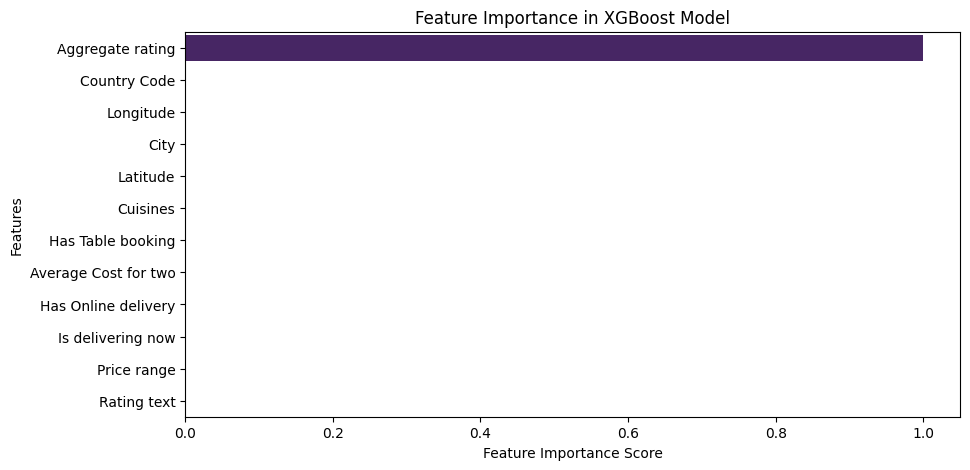

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from XGBoost
feature_importance = xgb_model.feature_importances_

# Create a DataFrame
feat_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp_df['Importance'], y=feat_imp_df['Feature'], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost Model")
plt.show()

In [ ]:
# Drop "Aggregate Rating" from features
X_train_new = X_train.drop(columns=['Aggregate rating'])
X_test_new = X_test.drop(columns=['Aggregate rating'])

# Train XGBoost again
xgb_model.fit(X_train_new, y_train)

# Predict again
y_pred_xgb_new = xgb_model.predict(X_test_new)

# Evaluate again
mse_xgb_new = mean_squared_error(y_test, y_pred_xgb_new)
rmse_xgb_new = mse_xgb_new ** 0.5
r2_xgb_new = r2_score(y_test, y_pred_xgb_new)

print("New XGBoost Mean Squared Error:", mse_xgb_new)
print("New XGBoost Root Mean Squared Error:", rmse_xgb_new)
print("New XGBoost R-squared Score:", r2_xgb_new)

New XGBoost Mean Squared Error: 0.031070400357473667
New XGBoost Root Mean Squared Error: 0.17626797882052675
New XGBoost R-squared Score: 0.986349335427365


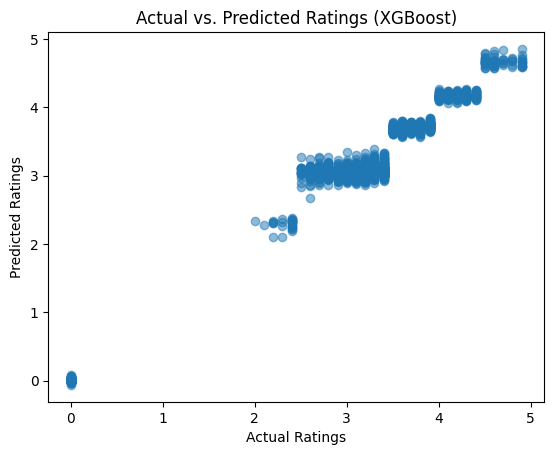

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_xgb_new, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings (XGBoost)")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_new, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
from xgboost import XGBRegressor

# Train with best parameters
xgb_final = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=200)
xgb_final.fit(X_train_new, y_train)

# Predict again
y_pred_xgb_final = xgb_final.predict(X_test_new)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse_final = mean_squared_error(y_test, y_pred_xgb_final)
rmse_final = mse_final ** 0.5
r2_final = r2_score(y_test, y_pred_xgb_final)

print("🔹 Final XGBoost MSE:", mse_final)
print("🔹 Final XGBoost RMSE:", rmse_final)
print("🔹 Final XGBoost R² Score:", r2_final)

🔹 Final XGBoost MSE: 0.030631553977916667
🔹 Final XGBoost RMSE: 0.1750187246494405
🔹 Final XGBoost R² Score: 0.9865421409482893


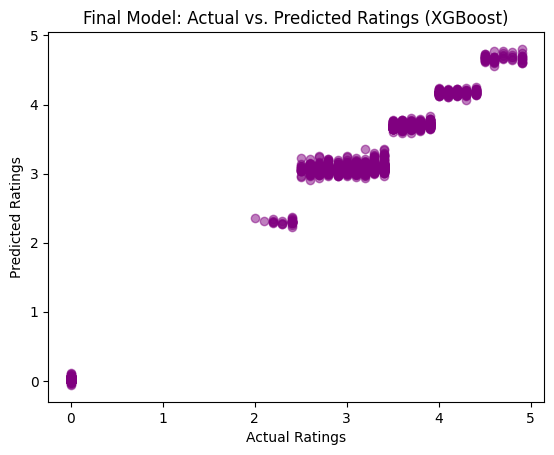

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_xgb_final, alpha=0.5, color='purple')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Final Model: Actual vs. Predicted Ratings (XGBoost)")
plt.show()